##                                        Data Analysis of Heart Disease Dataset 

*The Heart Disease dataset from the UCI Machine Learning Repository is a widely-used 
dataset in medical data analysis. It contains information about various health-related 
attributes of patients and whether they have heart disease or not. *  


#### Task 1 Load and Inspect the Data for the Heart Disease dataset:

1. ***Load the Dataset***  

In [38]:
import pandas as pd

# Load the dataset (adjust the path as needed)
df = pd.read_csv('heart.csv')

2. ***Basic Inspection Techniques***  

In [39]:
# View the first few rows
print(df.head())


   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [40]:
# Get statistical summaries
print(df.describe())


       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003 

In [41]:
# Check for data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


3. ***Check Distribution of the Target Variable***  

In [42]:
# Assuming the column is named target:
print(df['AHD'].value_counts())


AHD
No     164
Yes    139
Name: count, dtype: int64


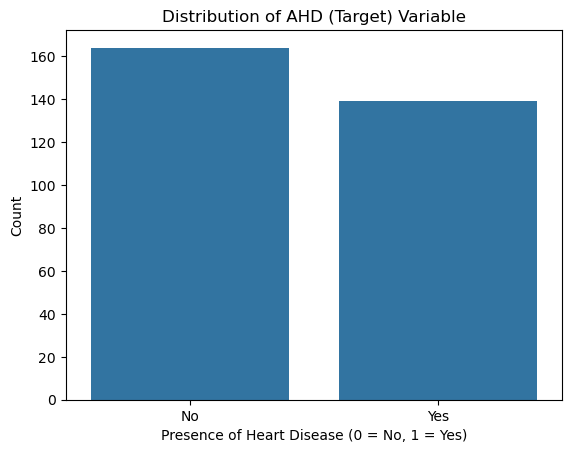

In [25]:
# Optional: Visualize the target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='AHD', data=df)
plt.title('Distribution of AHD (Target) Variable')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## Task 2: Data Cleaning and Preprocessing 


1. ***Handle Missing Data***  

In [43]:
# First, let's check for missing values:
print(df.isnull().sum())


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [44]:
#If any columns have missing values, discuss strategies for handling them 
#(e.g., filling with mean/median, or dropping rows).

df['Ca'] = df['Ca'].fillna(df['Ca'].mode()[0])
df['Thal'] = df['Thal'].fillna(df['Thal'].mode()[0])

# Verify missing values have been handled
print(df.isnull().sum())

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64


2. ***Feature Engineering***


In [36]:
# Convert categorical variables like Sex, ChestPainType, RestingECG, etc., into numeric format using encoding (e.g., one-hot encoding or label encoding).
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convert 'Sex' column to numeric (0 or 1)
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [35]:
#  Normalize or standardize numerical columns if necessary (e.g., RestingBP, Cholesterol, MaxHR). 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize numerical features
df[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df[['RestBP', 'Chol', 'MaxHR']])

3. ***Create New Features***

In [45]:
# Example: Combine Oldpeak and Slope to create a new feature that represents "exercise-induced heart stress"
df['HeartStress'] = df['Oldpeak'] * df['Slope']


In [48]:
# Final Preprocessing Code:
# Handle Missing Data
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Label Encoding for 'Sex'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# One-Hot Encoding for categorical variables with more than two categories
df = pd.get_dummies(df, columns=['ChestPain', 'RestECG', 'Thal'], drop_first=True)

# Standardize Numerical Columns (RestBP, Chol, MaxHR)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df[['RestBP', 'Chol', 'MaxHR']])

# Now you can check the dataframe to see the changes
print(df.head())


   Age  Sex    RestBP      Chol  Fbs     MaxHR  ExAng  Oldpeak  Slope   Ca  \
0   63    1  0.757525 -0.264900    1  0.017197      0      2.3      3  0.0   
1   67    1  1.611220  0.760415    0 -1.821905      1      1.5      2  3.0   
2   67    1 -0.665300 -0.342283    0 -0.902354      1      2.6      2  2.0   
3   37    1 -0.096170  0.063974    0  1.637359      0      3.5      3  0.0   
4   41    0 -0.096170 -0.825922    0  0.980537      0      1.4      1  0.0   

   AHD  HeartStress  ChestPain_nonanginal  ChestPain_nontypical  \
0   No          6.9                 False                 False   
1  Yes          3.0                 False                 False   
2  Yes          5.2                 False                 False   
3   No         10.5                  True                 False   
4   No          1.4                 False                  True   

   ChestPain_typical  RestECG_1  RestECG_2  Thal_normal  Thal_reversable  
0               True      False       True        Fal

## Task 3: Exploratory Data Analysis

1. ***Univariate Analysis***  

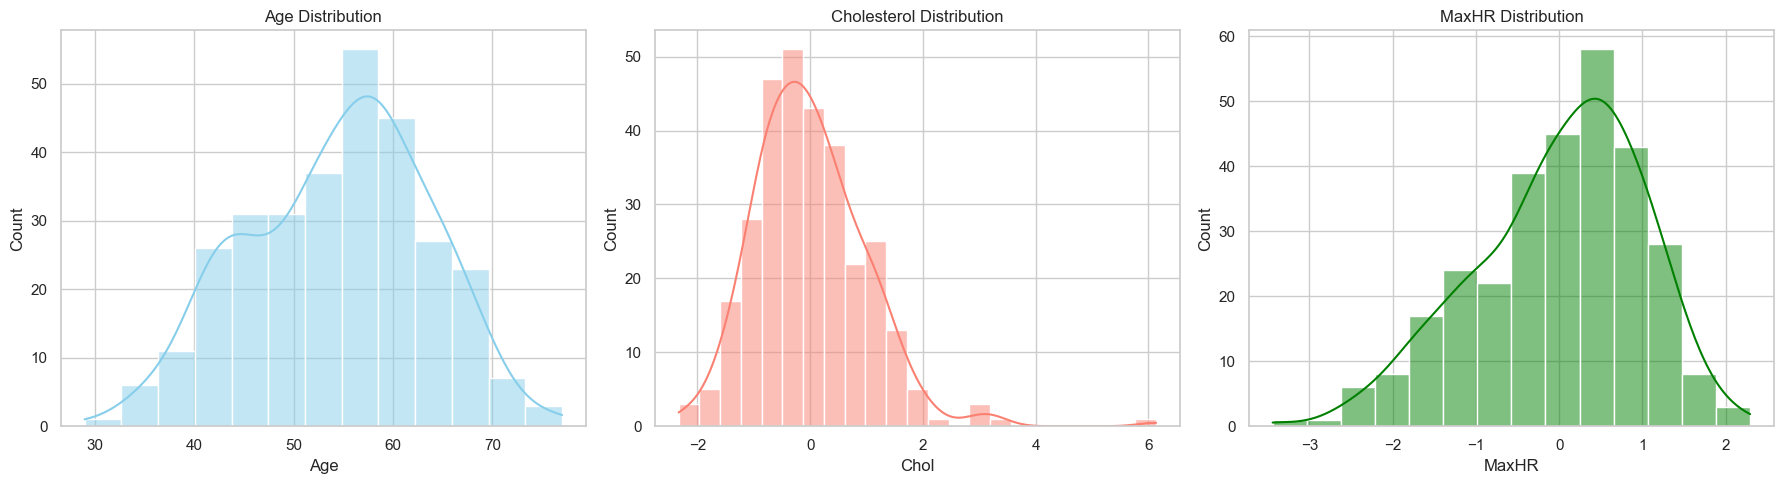

C:\Users\292596\AppData\Local\Temp\ipykernel_17288\4023998162.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AHD', data=df, palette='Set1')


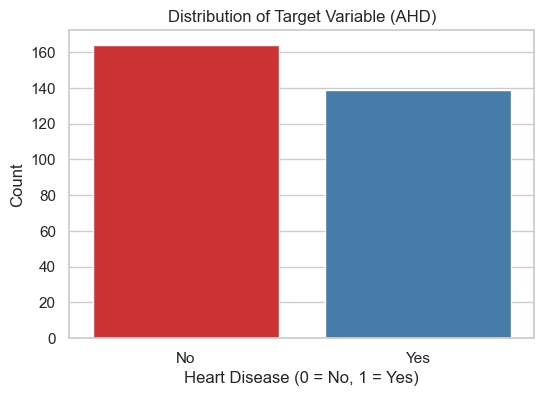

In [51]:
# We will plot the distribution of key numerical features such as Age, Cholesterol, and MaxHR. We'll also visualize the distribution of the target variable (AHD).
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of Age, Cholesterol, MaxHR
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(df['Chol'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Cholesterol Distribution')

sns.histplot(df['MaxHR'], kde=True, ax=axes[2], color='green')
axes[2].set_title('MaxHR Distribution')

plt.tight_layout()
plt.show()

# Visualizing the distribution of the target variable 'AHD'
plt.figure(figsize=(6, 4))
sns.countplot(x='AHD', data=df, palette='Set1')
plt.title('Distribution of Target Variable (AHD)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


2. ***Bivariate Analysis***


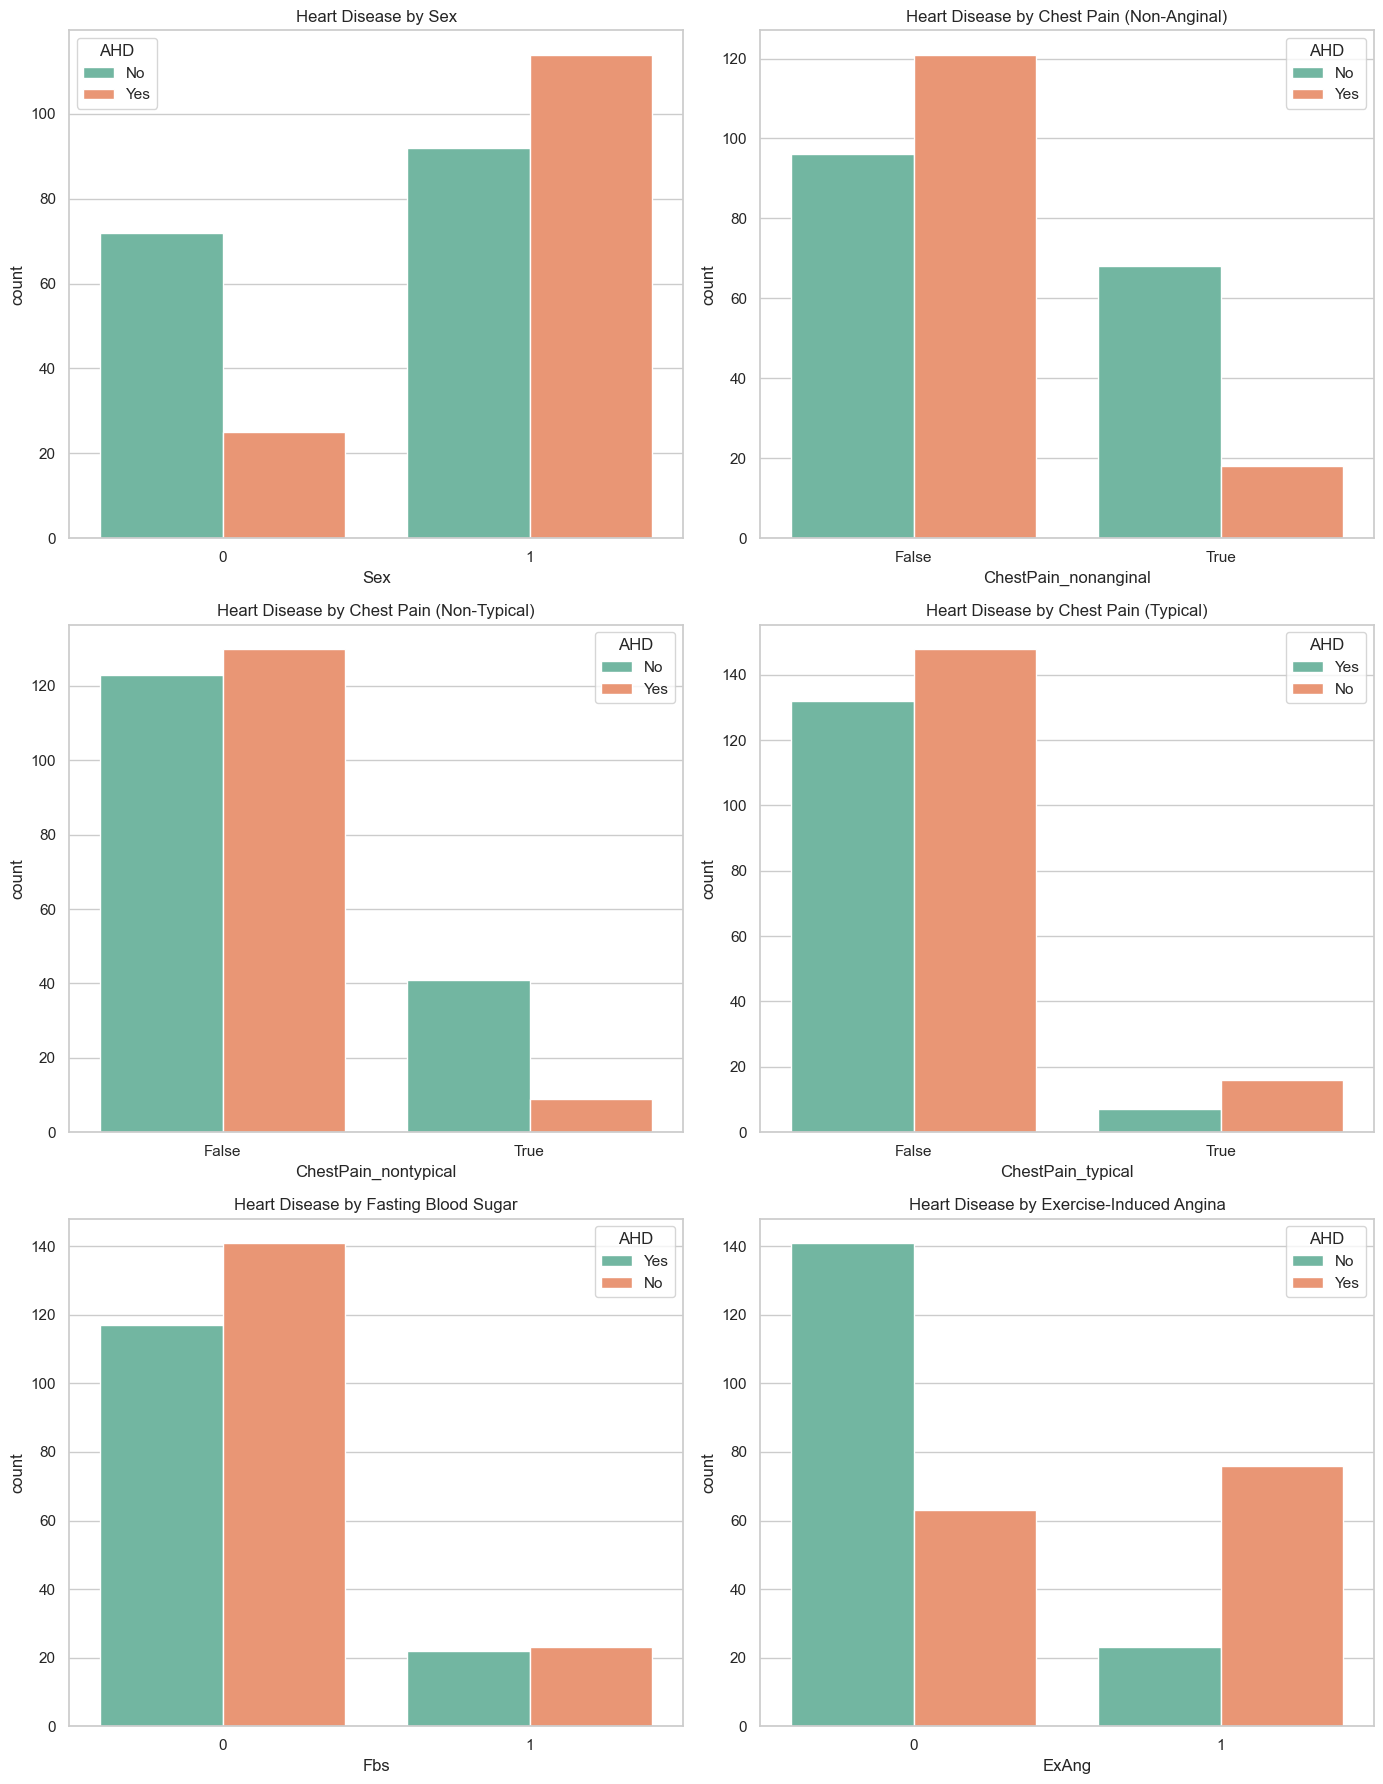

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # Adjusting to a 3x2 grid to accommodate all plots

# Countplot for Sex
sns.countplot(x='Sex', hue='AHD', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Heart Disease by Sex')

# Countplot for ChestPain types
sns.countplot(x='ChestPain_nonanginal', hue='AHD', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Heart Disease by Chest Pain (Non-Anginal)')

sns.countplot(x='ChestPain_nontypical', hue='AHD', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Heart Disease by Chest Pain (Non-Typical)')

sns.countplot(x='ChestPain_typical', hue='AHD', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Heart Disease by Chest Pain (Typical)')

# Countplot for FBS (Fasting Blood Sugar)
sns.countplot(x='Fbs', hue='AHD', data=df, ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Heart Disease by Fasting Blood Sugar')

# Countplot for ExAng (Exercise-induced Angina)
sns.countplot(x='ExAng', hue='AHD', data=df, ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Heart Disease by Exercise-Induced Angina')

plt.tight_layout()
plt.show()
